In [136]:
# Dependencies
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import json
import numpy as np
import time
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [137]:
# Twitter API keys
consumer_key = 'Hi8F0fFbzX3L3DczlZDobQBCm'
consumer_secret = 'kN2ddiPaMFgqBiqDIqUNyblJd91ODHYphGzb1Aii7q9b7tn8Xv'
access_token = '933136362651262976-mr6EH2ZmyMC3Klw5C9Oapkp04CnymaC'
access_token_secret = 'HCScnHUYgeNz3iXhe1DYbDFLc5sZW6L1dKoy20fJt9FEM'

# Twitter credentials
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [138]:
# Create columns for dataframe
sentiments = {'Tweet Number': '',
              'News Organization': '',
              'Tweet': '',
              'Compound Score': '',
              'Positive Score': '',
              'Negative Score': '',
              'Neutral Score': ''}

In [139]:
# Create list of news accounts
target_terms = ['@BBC', '@CBS', '@CNN', '@FoxNews', '@nytimes']

In [140]:
# Variable to hold list of the compound sentiment
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
tweet_number = []
text = []
news_source = []

# Loop through all target users
for target in target_terms:
        
    # Run search around each tweet
    screen_name = target
    public_tweets = api.user_timeline(target,
                                      count=100)
    
    # Index to see how many tweets for each news source
    index = 0
        
    # Loop through all tweets
    for tweet in public_tweets:
        
        news_organization = target
            
        # Run vader analysis on each tweet
        scores = analyzer.polarity_scores(tweet['text'])
        compound = scores['compound']
        pos = scores['pos']
        neu = scores['neu']
        neg = scores['neg']
            
        # Add value to list
        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)
        text.append(tweet['text'])
        tweet_number.append(index)
        news_source.append(news_organization)
        
        index = index + 1

In [141]:
# Add values from list to dataframe
sentiments['Tweet Number'] = tweet_number
sentiments['News Organization'] = news_source
sentiments['Tweet'] = text
sentiments['Compound Score'] = compound_list
sentiments['Positive Score'] = positive_list
sentiments['Negative Score'] = negative_list
sentiments['Neutral Score'] = neutral_list

sentiments_df = pd.DataFrame(sentiments)
sentiments_df.to_csv('sentimentsnewsmedia.csv')
sentiments_df

,Compound Score,Negative Score,Neutral Score,News Organization,Positive Score,Tweet,Tweet Number
0,0.6915,0.000,0.560,@BBC,0.440,RT @BBCOne: SO. MUCH. CUTE. 😍\n#Attenboroughan...,0
1,0.0000,0.000,1.000,@BBC,0.000,RT @BBCEarth: 'Never before have we had such a...,1
2,0.4391,0.000,0.855,@BBC,0.145,🌹@DuaLipa performing 'Homesick' was a complete...,2
3,-0.3818,0.126,0.874,@BBC,0.000,RT @BBCEarth: 'What shocks me ...is how fast t...,3
4,0.0000,0.000,1.000,@BBC,0.000,"RT @BBCOne: If we don’t act, coral reefs could...",4
5,0.0000,0.000,1.000,@BBC,0.000,"RT @BBCEarth: In 1986, many nations decided to...",5
6,0.0000,0.000,1.000,@BBC,0.000,Little things can make a big difference.\n#Blu...,6
7,-0.5574,0.231,0.769,@BBC,0.000,RT @BBCSpringwatch: Manmade materials are dest...,7
8,-0.8360,0.283,0.717,@BBC,0.000,RT @BBCEarth: It’s estimated that tens of mill...,8
9,0.0000,0.000,1.000,@BBC,0.000,RT @BBCOne: These are *all* items regurgitated...,9


In [142]:
# Get overall/average of sentiment compount values for each agency
avg_sentiments_df = sentiments_df.groupby('News Organization').mean()
avg_sentiments_df.to_csv('avgsentiments.csv')
avg_sentiments_df

,Compound Score,Negative Score,Neutral Score,Positive Score,Tweet Number
News Organization,,,,,
@BBC,0.170004,0.04050,0.85452,0.10496,49.5
@CBS,0.374197,0.00980,0.83015,0.16005,49.5
@CNN,-0.068466,0.08498,0.86150,0.05352,49.5
@FoxNews,0.022076,0.09076,0.80606,0.10318,49.5
@nytimes,0.032135,0.07532,0.83807,0.08660,49.5


In [143]:
# Get timestamp
present_date = time.strftime("%m/%d/%Y")
present_date

'12/10/2017'

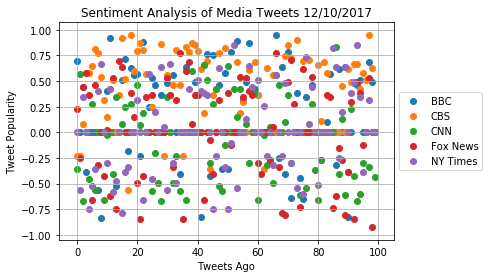

In [144]:
# Create dataframe for each news source and plot
bbc_compound_df = sentiments_df.loc[sentiments_df['News Organization'] == '@BBC']
plt.scatter(bbc_compound_df['Tweet Number'], bbc_compound_df['Compound Score'], label='BBC')

cbs_compound_df = sentiments_df.loc[sentiments_df['News Organization'] == '@CBS']
plt.scatter(cbs_compound_df['Tweet Number'], cbs_compound_df['Compound Score'], label='CBS')

cnn_compound_df = sentiments_df.loc[sentiments_df['News Organization'] == '@CNN']
plt.scatter(cnn_compound_df['Tweet Number'], cnn_compound_df['Compound Score'], label='CNN')

foxnews_compound_df = sentiments_df.loc[sentiments_df['News Organization'] == '@FoxNews']
plt.scatter(foxnews_compound_df['Tweet Number'], foxnews_compound_df['Compound Score'], label='Fox News')

nytimes_compound_df = sentiments_df.loc[sentiments_df['News Organization'] == '@nytimes']
plt.scatter(nytimes_compound_df['Tweet Number'], nytimes_compound_df['Compound Score'], label='NY Times')

plt.title(f'Sentiment Analysis of Media Tweets {present_date}')
plt.xlabel('Tweets Ago')
plt.ylabel('Tweet Popularity')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.savefig('CompoundNewsMedia.png')
plt.show()

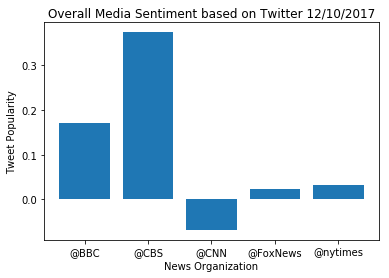

In [146]:
# Plot average sentiment compound of each source
# Reset index
updated_sentiments_df = avg_sentiments_df.reset_index()

plt.bar(updated_sentiments_df['News Organization'], updated_sentiments_df['Compound Score'])
plt.title(f'Overall Media Sentiment based on Twitter {present_date}')
plt.xlabel('News Organization')
plt.ylabel('Tweet Popularity')
plt.savefig('AvgCompoundNewsMedia.png')
plt.show()

ANALYSIS
1. Overall, from the bar graph, CNN is the most negative of the group of news organizations.
2. CBS is the most positive as we can see from both the scatter plot and bar graph.
3. NY Times looks like its the most neutral with many points located at 0 for tweet popularity.